# **Cabeçalho**

Aluno 1 - NUSP - Graduação/Pós - Período

Aluno 2 - NUSP - Graduação/Pós - Período

# Aula 10 - Classificação com texto utilizando Decision Trees e Support Vector Machines (SVMs)

## Decision Trees

<p align="justify"> Árvores de decisão são um modelo popular no campo de machine learning e são usadas para tarefas de classificação e de regressão. Elas são uma representação gráfica de um processo de tomada de decisão que toma uma série de decisões com base nas características dos dados de entrada (features) para classificar ou prever um resultado. Aqui estão alguns conceitos importantes desse modelo:

* <p align="justify"> <b>Estrutura de árvore</b>: Uma árvore de decisão é composta por nós (<i>nodes</i>) e ramos (<i>branches</i>). O nó raiz (<i>Root Node</i>) representa o ponto de partida, e os nós internos (<i>internal nodes</i>) representam decisões a serem tomadas com base em certos critérios. Os ramos conectam os nós e indicam as possíveis saídas de cada decisão.

* <p align="justify"> <b>Divisão de dados</b>: O processo começa com a escolha da melhor característica (ou atributo) para dividir os dados em subconjuntos. Essa escolha é feita com base em uma métrica de impureza, como a entropia ou o índice Gini. O objetivo é maximizar a pureza ou minimizar a impureza nos subconjuntos resultantes. A impureza neste caso é a presença de várias classes em um único nó. Quanto mais 'puro', menos classes em um único nó.

* <p align="justify"> <b>Nós filhos</b>: Após a divisão, novos nós são criados representando subconjuntos de dados. O processo de escolher a próxima melhor característica para dividir continua recursivamente até que um critério de parada seja atingido. Esse critério pode ser um limite na profundidade da árvore, um número mínimo de amostras por nó ou uma pureza mínima nos nós folha.

* <p align="justify"> <b>Nós folha</b>: Quando o critério de parada é alcançado, os nós folha são criados. Cada nó folha representa uma classe (no caso de classificação) ou uma previsão numérica (no caso de regressão).

* <p align="justify"> <b>Classificação e previsão</b>: Para classificar um novo exemplo, ele é passado através da árvore, seguindo as decisões feitas em cada nó até chegar a um nó folha, que fornece a classe prevista. Para previsão numérica, a saída é o valor previsto no nó folha correspondente.

* <p align="justify"> <b>Avaliação e ajuste</b>: As árvores de decisão podem ser avaliadas quanto à sua precisão e podem ser ajustadas por meio de técnicas como poda (redução de ramos menos importantes) ou ajuste de hiperparâmetros para evitar superajustes (overfitting).

<p align="justify"> Árvores de decisão têm várias vantagens, como serem fáceis de interpretar e explicar, além de lidar com dados categóricos e numéricos. No entanto, elas também têm desvantagens, como tendência ao overfitting em árvores profundas. Para mitigar isso, técnicas como florestas aleatórias (Random Forests) e gradient boosting foram desenvolvidas, que utilizam várias árvores de decisão em conjunto para melhorar o desempenho do modelo. Iremos ver alguns desses métodos mais à frente na próxima aula.

A figura abaixo resume os principais nomes e conceitos de decision trees ([Fonte](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/)).

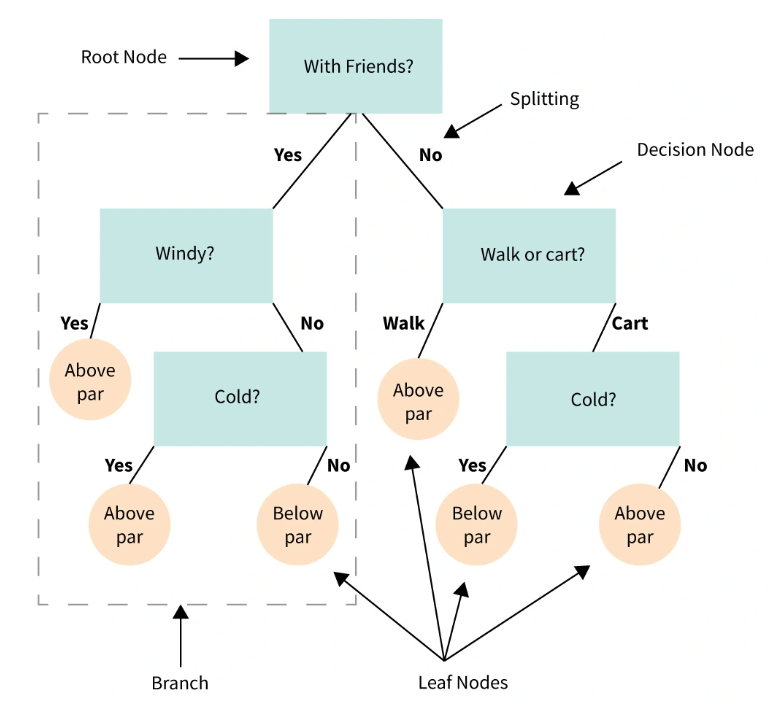

Aqui estão algumas das vantagens e desvantagens deste modelo:

**Vantagens das Árvores de Decisão**:

* As árvores de decisão são modelos altamente interpretáveis. É fácil entender como as decisões são tomadas ao seguir os ramos da árvore, tornando-as uma ótima escolha quando é importante explicar o raciocínio por trás das previsões.

* Árvores de decisão podem lidar com conjuntos de dados que contêm tanto atributos categóricos quanto numéricos sem a necessidade de pré-processamento significativo.

* Geralmente, requer menos pré-processamento de dados em comparação com outros algoritmos. Não é necessário normalizar os dados, escalar características ou tratar valores ausentes.

* São rápidas para treinar e prever, pois a complexidade do tempo é linear em relação ao número de exemplos de treinamento e ao número de atributos.

**Desvantagens das Árvores de Decisão**:

* As árvores de decisão têm uma tendência natural ao overfitting, especialmente quando são profundas. Elas podem se ajustar muito bem aos dados de treinamento, mas podem não generalizar bem para novos dados. Isso pode ser mitigado com técnicas de poda e ajuste de hiperparâmetros.

* Pequenas mudanças nos dados de treinamento podem resultar em árvores de decisão muito diferentes, tornando o modelo instável (Alta Variância).

* Árvores de decisão tendem a ser enviesadas para classes majoritárias em conjuntos de dados desequilibrados, a menos que medidas adicionais sejam tomadas.

* Para problemas com relações complexas entre variáveis, as árvores de decisão podem ser inadequadas, pois podem não capturar essas relações de maneira eficaz.

* À medida que a árvore cresce, o número de ramos e nós aumenta exponencialmente, o que pode levar a árvores muito grandes e difíceis de interpretar.

Em resumo, árvores de decisão são uma ferramenta poderosa em machine learning, especialmente quando a interpretabilidade é importante e os dados são relativamente simples. No entanto, é essencial estar ciente de suas desvantagens e tomar medidas para mitigá-las, como a poda da árvore e o ajuste de hiperparâmetros, para obter um desempenho adequado em uma variedade de cenários.

Para a aplicação deste modelo, vamos trabalhar com um banco de dados que já vimos anteriormente, o de Default:

In [ ]:
import pandas as pd

# URL do arquivo Excel raw no GitHub
url = "https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Default.xlsx"

# Carrega o arquivo Excel em um DataFrame
df = pd.read_excel(url)

df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


Vamos também importar algumas bibliotecas e funções:

In [ ]:
import numpy as np
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Métricas

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split # Import train_test_split function

Transformar o banco de dados:

In [ ]:
# Converte as variáveis categóricas em numéricas usando codificação one-hot
df_encoded = pd.get_dummies(df, columns=['default', 'student'], drop_first=True,
                            dtype= int)

df_encoded

Vamos aplicar o modelo no nosso banco de dados, mas limitando bastante o quanto a arvore pode crescer com a opção "max_depth":

In [ ]:
# Carregando o modelo
modelo = DecisionTreeClassifier(criterion = 'entropy', # Métrica de pureza dos nós
                                max_depth = 3, # Até quanto a arvore vai crescer
                                random_state = 42) # Decision trees tem muita variância, é necessário limitar isto.

# Extraindo Features e Target

X = df_encoded[['balance', 'income', 'student_Yes']]
y = df_encoded['default_Yes']

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% para treino e 20% para teste

# Treinar o modelo
modelo = modelo.fit(X_train,y_train)

# Prevendo os valores no banco de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_test, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')

Se você lembra dos resultados que obtivemos com a regressão logística, pode observar que os valores obtidos aqui não são tão diferentes (Na verdade, um pouco piores). Então, qual a vantagem de utilizar decision trees no lugar de uma regressão logística? Nós podemos visualizá-la.

In [ ]:
from sklearn.tree import export_graphviz, plot_tree, export_text
from graphviz import Source

export_graphviz(modelo,
                out_file='tree.dot',
                rounded=True,
                filled = True,
                feature_names = ['balance', 'income', 'student_Yes'],
                class_names=['Adimplente','Inadimplente'])

Source.from_file('tree.dot')

De forma alternativa, também podemos visualizar a árvore como texto:

In [ ]:
print(export_text(modelo,
                  feature_names = ['balance', 'income', 'student_Yes'],
                  show_weights = True))

Uma primeira coisa que salta aos olhos é a ausência dos outros dois preditores nas decisões do modelo: Apenas o balance é considerado. E vemos também que o modelo só classifica como inadimplente aqueles que tem um balance maior que 2037.47, e ainda com alguma incerteza e impureza (tem duas possibilidades nesta folha final). Aqui vemos o peso do desbalanceamento das classes no modelo. Também vemos a importância da escolha dos hiperparâmetros (*max_depth* neste caso), que podem alterar muito o resultado e interpretabilidade do modelo final.

Vejamos o que aconteceria se não limitassemos o tamanho da árvore com a opção 'Max_depth':

In [ ]:
# Carregando o modelo
modelo = DecisionTreeClassifier(criterion = 'entropy', # Métrica de pureza dos nós
                                random_state = 42) # Decision trees tem muita variância, é necessário limitar isto.

# Extraindo Features e Target

X = df_encoded[['balance', 'income', 'student_Yes']]
y = df_encoded['default_Yes']

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% para treino e 20% para teste

# Treinar o modelo
modelo = modelo.fit(X_train,y_train)

# Prevendo os valores no banco de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_test, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')

Veja que os resultados para a classe minoritária são um pouco melhor. No entanto, observe o que ocorre com a árvore:

In [ ]:
from sklearn.tree import export_graphviz, plot_tree, export_text
from graphviz import Source

export_graphviz(modelo,
                out_file='tree.dot',
                rounded=True,
                filled = True,
                feature_names = ['balance', 'income', 'student_Yes'],
                class_names=['Adimplente','Inadimplente'])

Source.from_file('tree.dot')

Ela fica tão grande que é difícil até de vê-la por inteiro no Colab. Vamos ver também em texto:

In [ ]:
print(export_text(modelo,
                  feature_names = ['balance', 'income', 'student_Yes'],
                  show_weights = True))

Podemos ver que as outras variáveis preditivas passam a ser incluídas nas decisões, mas é muito difícil de interpretar o que está acontecendo com esta árvore. Precisamos de alguma forma de limitar o tamanho da árvore mas sem perder muito a flexibilidade (e performance). Para isso, vamos fazer cross-validation e testar formas de podar a árvore.

### Cross-validation.

Aqui, iremos utilizar algumas funções presentes no Scikit-Learn para a Validação Cruzada. Vamos começar utilizando o ShuffleSplit, que nos permite controlar o número de splits no cross-validation:

In [ ]:
validacao = skm.ShuffleSplit(n_splits=5,
                             test_size = .20, # Tamanho para teste
                             random_state = 42)



resultados = skm.cross_validate(modelo, # Modelo a ser utilizado
                                X, # Preditores (features)
                                y, # Var. Dep. (Target)
                                cv = validacao, # Métodos de Cross-validation
                                verbose = 3 # Informações sobre o processo de validação
                                )

print(resultados['test_score'])



Em 5 splits, temos valores na casa dos 95% e 96% de predições nos respectivos bancos de validação. Podemos calcular a média:

In [ ]:
media = resultados['test_score'].mean()
print(f'Média dos 10 splits: {round(media,2)}')

Fizemos isto com o banco inteiro. Agora, vamos fazer a validação cruzada aninhada. Isto é, dividindo o banco inteiro entre treino e teste e realizando a cross-validation no banco de treino. Primeiro, vamos retreinar o modelo no banco de treino.

In [ ]:
# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% para treino e 20% para teste

# Retreinar o modelo no banco de treino

modelo = DecisionTreeClassifier(criterion = 'entropy',
                                random_state = 42)
modelo.fit(X_train, y_train)

# Prevendo os valores no banco de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_test, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')


A entropia é usada para avaliar a pureza de um nó, ou seja, quão homogêneas são as classes das amostras em um nó específico. Quanto menor a entropia, mais puro é o nó, o que significa que ele contém principalmente amostras de uma única classe. Quanto maior a entropia, mais misturadas ou desordenadas são as amostras em um nó, o que indica que o nó contém amostras de várias classes.

A função cost_complexity_pruning no scikit-learn é um método que permite podar (reduzir) uma árvore de decisão após sua construção para evitar overfitting e criar modelos mais generalizados. A poda é realizada ajustando um parâmetro chamado "complexity parameter" (parâmetro de complexidade) em busca de um equilíbrio entre a capacidade da árvore de ajustar os dados de treinamento e sua capacidade de generalização para novos dados.

A entropia desempenha um papel importante na função cost_complexity_pruning. O "complexity parameter" é um hiperparâmetro que controla a quantidade de poda que será aplicada à árvore de decisão. Quanto maior o valor do "complexity parameter," mais a árvore será podada. A medida de custo para a poda é baseada na entropia dos nós da árvore.

Agora, vamos utilizar o método 'cost_complexity_pruning_path' para obtermos valores que irão nos auxiliar na poda da árvore, e realizar um k-fold com 5 dobras.

In [ ]:
ccp_valores = modelo.cost_complexity_pruning_path(X_train, y_train)

# Realizando o k-fold

kfold = skm.KFold(5,
                  random_state = 42,
                  shuffle = True)



A função GridSearchCV (Cross-Validation de Busca em Grade) é uma ferramenta em machine learning usada para encontrar a combinação ideal de hiperparâmetros para um modelo. Os hiperparâmetros são configurações que não são aprendidas pelo modelo, mas afetam seu desempenho, como a profundidade de uma árvore de decisão ou a taxa de aprendizado em um algoritmo de gradient boosting. Vamos utilizar ela aqui para que possamos escolher o melhor tamanho de árvore:

In [ ]:

# Definindo o grid_search
grid_search = skm.GridSearchCV(modelo,
                               {'ccp_alpha': ccp_valores.ccp_alphas},
                               refit = True,
                               cv = kfold,
                               scoring = 'f1_macro') #  Queremos o modelo mais equilibrado em ambas as classes

# Retreinando o modelo com a cross-validation
grid_search.fit(X_train, y_train)

# Pegando o melhor score obtido
grid_search.best_score_

O melhor f1-Macro obtido nas 5 iterações foi de 0,74. Vamos ver qual árvore foi "vencedora".

In [ ]:
# Criando a figura
ax = subplots(figsize = (12,12))[1]

# Pegando o melhor fold
best_ = grid_search.best_estimator_


# Plotando a árvore
plot_tree(best_,
          feature_names = ['balance', 'income', 'student_Yes'],
          class_names=['Adimplente','Inadimplente'],
          ax = ax)

In [ ]:
print(export_text(best_,
                  feature_names = ['balance', 'income', 'student_Yes'],
                  show_weights = True))

Conseguimos uma árvore menor e mais compacta, o que é ótimo para interpretabilidade. Podemos ver que a variável que mais importou para o modelo foi a de balance e que indíviduo com um balance maior que 1799,9 foram classificados como inadimplentes. Vamos ver como o modelo performa no banco de teste:

In [ ]:
# Prevendo os valores no banco de teste
y_pred = best_.predict(X_test)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_test, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')

Obtívemos uma melhora bem relevante na classe minoritária. Uma árvore menos complexa acabou por gerar melhores resultados. O Grid_search é uma ótima ferramenta que auxilia na escolha dos hiperparâmetros mais adequados.

### Classificação de Texto com Decision Trees

<p align="justify"> Árvores de decisão são geralmente usadas em tarefas de classificação e regressão, mas são menos comuns na classificação de texto em comparação com outras técnicas, como  redes neurais convolucionais (CNN) e redes neurais recorrentes (RNN). No entanto, ainda é possível aplicar árvores de decisão à classificação de texto em cenários específicos, e elas podem ter suas vantagens em certas situações. Aqui estão algumas considerações sobre o uso de árvores de decisão na classificação de texto:

* <p align="justify"> Pré-processamento de Texto: Árvores de decisão são robustas e podem lidar com dados textuais que foram pré-processados de várias maneiras, como a criação de vetores de palavras (word embeddings) ou a extração de características textuais. No entanto, você precisa transformar o texto em recursos numéricos para usá-los em uma árvore de decisão, como contagens de palavras ou representações TF-IDF.

* <p align="justify"> Interpretabilidade: Uma vantagem das árvores de decisão é a interpretabilidade. Quando usadas para classificação de texto, você pode visualizar a árvore gerada e entender quais palavras ou características do texto levaram a uma decisão específica. Isso pode ser útil em cenários em que a transparência e a explicabilidade do modelo são críticas.

* <p align="justify"> Limitações com Dados Textuais Complexos: Árvores de decisão podem ter dificuldade em lidar com texto altamente complexo, como tarefas de processamento de linguagem natural (NLP) avançadas, onde as relações entre palavras são complexas e sutis. Modelos baseados em redes neurais são geralmente mais adequados para essas tarefas.

* <p align="justify"> Overfitting: Assim como em outras aplicações, as árvores de decisão têm uma tendência natural ao overfitting, especialmente em problemas de NLP, onde os dados de texto podem ser ruidosos e variáveis. É importante ajustar adequadamente os hiperparâmetros e considerar técnicas como a poda da árvore.

* <p align="justify"> Limitação na Representação de Sequências: Árvores de decisão tratam cada palavra ou característica do texto como independente das outras, o que pode ser uma limitação ao capturar informações de sequência e contexto. Modelos de sequência, como RNNs e LSTMs, são mais adequados para tarefas de NLP que exigem consideração do contexto.

<p align="justify"> Em resumo, árvores de decisão podem ser usadas na classificação de texto, mas são mais apropriadas para tarefas de NLP mais simples e, muitas vezes, são superadas por modelos de aprendizado profundo em tarefas mais complexas. A escolha entre árvores de decisão e modelos de aprendizado profundo depende da natureza da tarefa, do tamanho do conjunto de dados e da necessidade de interpretabilidade.

#### TF-IDF

Antes de partimos para a classificação de textos utilizando decision trees, primeiro precisamos apresentar uma nova forma de processar o texto para que ele seja utilizado no modelo: o TF-IDF. No último laboratório, vimos como transformar o texto em uma bag-of-words, que captura a ocorrência de palavras únicas em cada documento (ou tweet).

O  TF-IDF é uma técnica amplamente usada em processamento de linguagem natural (NLP) para avaliar a importância de palavras (ou termos) em um documento em relação a uma coleção de documentos. A sigla TF-IDF significa "Term Frequency-Inverse Document Frequency" (Frequência do Termo-Inverso da Frequência nos Documentos, em português), e a técnica combina duas métricas: a frequência do termo (TF) e a frequência inversa do documento (IDF).

Aqui está uma explicação mais detalhada de cada parte do TF-IDF:

**Frequência do Termo (TF - Term Frequency)**: A primeira parte, TF, avalia a importância de um termo em um documento específico. Ela é calculada contando quantas vezes um termo aparece no documento. Quanto mais frequentemente o termo aparece, maior é o seu valor TF. Pode ser calculada de várias maneiras, como simplesmente contando o número de vezes que o termo ocorre ou usando uma versão normalizada para evitar o viés em relação ao tamanho do documento.

Fórmula básica do TF:

TF(t, d) = (Número de vezes que o termo t aparece no documento d) / (Número total de termos no documento d)

**Frequência Inversa do Documento (IDF - Inverse Document Frequency)**: A segunda parte, IDF, avalia a importância de um termo em toda a coleção de documentos. Ela é calculada usando o logaritmo do inverso da fração de documentos que contêm o termo. Termos raros têm um alto valor IDF, enquanto termos comuns têm um valor IDF mais baixo.

Fórmula básica do IDF:

IDF(t) = log(N / n)

Onde:

N é o número total de documentos na coleção.
n é o número de documentos que contêm o termo t.

**TF-IDF Score**: O valor TF-IDF é calculado multiplicando o valor TF pelo valor IDF para um termo específico em um documento. Isso produz um escore que indica a importância do termo nesse documento em relação à coleção inteira.

Fórmula do TF-IDF:

TF-IDF(t, d) = TF(t, d) * IDF(t)

A pontuação TF-IDF é usada para classificar a importância dos termos em um documento e é frequentemente usada em tarefas como recuperação de informações, mineração de texto, classificação de documentos e análise de sentimentos. Termos com pontuações TF-IDF mais altas são considerados mais importantes no contexto do documento, enquanto termos com pontuações mais baixas são considerados menos relevantes.

Essa técnica ajuda a destacar palavras-chave importantes e pode ser usada para realizar pesquisas eficazes, bem como para extrair recursos significativos de texto em aplicações de aprendizado de máquina relacionadas ao processamento de texto. Vamos ver um exemplo prático:

Passo 1 - O Vetorizador

In [ ]:
# Importando o vetorizador do SKlearn

from sklearn.feature_extraction.text import TfidfVectorizer

Passo 2 - O texto

In [ ]:
# Exemplo de texto

documentos = [
    "Este é um exemplo de documento.",
    "Outro exemplo de documento é diferente do primeiro.",
    "Finalmente, o terceiro exemplo de documento."
]

Passo 3 - Vetorizar  o texto

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documentos)

Passo 4 - Visualizar a transformação

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

for i, doc in enumerate(documentos):
    print(f"Documento {i + 1}:")
    for j, term in enumerate(feature_names):
        tfidf_score = tfidf_values[i][j]
        if tfidf_score > 0:
            print(f"{term}: {tfidf_score:.2f}")
    print()

Documento 1:
de: 0.34
documento: 0.34
este: 0.57
exemplo: 0.34
um: 0.57

Documento 2:
de: 0.26
diferente: 0.45
do: 0.45
documento: 0.26
exemplo: 0.26
outro: 0.45
primeiro: 0.45

Documento 3:
de: 0.34
documento: 0.34
exemplo: 0.34
finalmente: 0.57
terceiro: 0.57



#### Classificação de Relevância dos Tweets

A saída mostra os termos em cada documento com suas pontuações TF-IDF. Termos com pontuações mais altas são considerados mais importantes para aquele documento. Você pode aplicar a mesma ideia para documentos mais complexos. Vamos agora a um exemplo utilizando a classificação de relevância de nossos tweets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caminho = "/content/sample_data/tweets_2.0_2020.csv"
df_ex = pd.read_csv(caminho)

df_ex.head()

,tweet_id,content,Corrected_sentimento,Corrected_stance,Corrected_relevante,Corrected_children,round,date_post,year
0,A522,A cabeça pensa onde o pé pisa. Quem governa de...,negative,favorable,relevant,true,1,2020-09-15,2020
1,A457,Sarto vai fazer um grande Programa de Enfrenta...,positive,favorable,relevant,false,1,2020-11-20,2020
2,A445,A Câmara dos Deputados votou hoje a MP que tra...,negative,favorable,relevant,false,1,2020-12-18,2020
3,A546,Tirar Bolsonaro do poder é uma questão de vida...,negative,favorable,relevant,false,1,2020-11-10,2020
4,A847,E a LIESA decidiu adiar os desfiles do #Carnav...,negative,favorable,relevant,false,1,2020-09-24,2020


Vamos processar a coluna de texto

In [ ]:
import re

# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex["texto_processado"] = df_ex['content'].apply(preprocess_text)

Vamos extrair os dados e dividi-los entre treino e teste

In [ ]:
texto = df_ex['texto_processado']
target = df_ex['Corrected_relevante']

X_treino, X_teste, y_treino, y_teste = train_test_split(texto,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

Como está a distribuição de classes?

In [ ]:
y_treino.value_counts()

In [ ]:
y_teste.value_counts()

Vamos vetorizar o texto e tirar as stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Definindo o dicionário de stop_words
stop_words = stopwords.words('portuguese')

# Criando o vetorizador, utilizando nossa lista de stop_words

tfidf_vectorizer = TfidfVectorizer(stop_words = stop_words)

# Vetorizando o texto com TF_IDF

X_treino_vetorizado = tfidf_vectorizer.fit_transform(X_treino)

# Imprimindo o Tf-idf do primeiro tweet
print(X_treino_vetorizado[:1])


  (0, 6445)	0.35910075778831735
  (0, 1832)	0.30349908366161477
  (0, 10563)	0.1405743968996304
  (0, 8367)	0.2153577286383595
  (0, 4220)	0.35910075778831735
  (0, 6709)	0.33981846404954885
  (0, 3613)	0.22091287391501224
  (0, 7851)	0.1601305988079406
  (0, 8276)	0.22841702852530746
  (0, 4524)	0.24526000585712004
  (0, 5124)	0.2591811432258126
  (0, 8293)	0.2923449361524524
  (0, 6618)	0.35910075778831735


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Esses números não dizem muita coisa. Vamos transformar isso em palavras e visualizar as palavras mais relevantes do nosso banco de treinamento.

In [ ]:
# Pegando as palavras do vocabulário gerado pelo TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()

# Convertendo toda a matriz esparsa em uma array densa
tfidf_values = X_treino_vetorizado.toarray()

# Calculando a média dos valores TF-IDF para cada palavra (ao longo dos documentos)
mean_tfidf_values = np.mean(tfidf_values, axis=0)

# Criando um DataFrame para associar palavras e seus valores médios de TF-IDF
df_tfidf = pd.DataFrame({"Word": words, "Mean_TF-IDF": mean_tfidf_values})

# Ordenando as palavras pelo valor médio de TF-IDF
df_tfidf_sorted = df_tfidf.sort_values(by="Mean_TF-IDF", ascending=False)

# Exibindo as 20 palavras mais relevantes em todo o conjunto de treino
print(df_tfidf_sorted.head(20))

             Word  Mean_TF-IDF
10528      vacina     0.028009
2661        covid     0.021590
2499       contra     0.018517
9352           sa     0.017424
10563   vacinação     0.015906
1417    bolsonaro     0.015785
1474       brasil     0.014812
9341          rus     0.012992
2019   cloroquina     0.011709
9719        sobre     0.011505
5070      governo     0.010982
2599      coronav     0.010816
10186       todos     0.010134
7519     pandemia     0.010113
7851      pessoas     0.010036
7463           pa     0.009528
5232         hoje     0.009224
3378          dia     0.009205
6709          mil     0.009141
10755        vida     0.008865


Podemos visualizar isso também como uma nuvem de palavras

In [ ]:
from wordcloud import WordCloud # Biblioteca
import matplotlib.pyplot as plt

# Criando um dicionário com as palavras e seus valores de TF-IDF para a nuvem de palavras
word_tfidf_dict = dict(zip(df_tfidf["Word"], df_tfidf["Mean_TF-IDF"]))

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Vamos treinar um modelo de decision trees de RELEVANCIA com esse banco de treinamento.

In [ ]:
# treinar o modelo no banco de treino

modelo = DecisionTreeClassifier(criterion = 'entropy',
                                random_state = 42)
modelo.fit(X_treino_vetorizado, y_treino)

Transformar agora o banco de teste

In [ ]:
X_teste_vetorizado = tfidf_vectorizer.transform(X_teste)


X_teste_vetorizado


Vamos ver se o banco de teste é muito diferente do de treino:

In [ ]:
# Pegando as palavras do vocabulário gerado pelo TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()

# Convertendo toda a matriz esparsa de teste em um array denso
tfidf_values_test = X_teste_vetorizado.toarray()

# Calculando a média dos valores TF-IDF para cada palavra no conjunto de teste
mean_tfidf_values_test = np.mean(tfidf_values_test, axis=0)

# Criando um DataFrame para associar palavras e seus valores médios de TF-IDF (no conjunto de teste)
df_tfidf_test = pd.DataFrame({"Word": words, "Mean_TF-IDF": mean_tfidf_values_test})

# Ordenando as palavras pelo valor médio de TF-IDF no conjunto de teste
df_tfidf_test_sorted = df_tfidf_test.sort_values(by="Mean_TF-IDF", ascending=False)

# Exibindo as 20 palavras mais relevantes no conjunto de teste
print(df_tfidf_test_sorted.head(20))

Encontramos muitas das mesmas palavras, mesmo que com algumas alterações no TF-IDF.

In [ ]:
# Criando um dicionário com as palavras e seus valores de TF-IDF (para a nuvem de palavras)
word_tfidf_dict_test = dict(zip(df_tfidf_test["Word"], df_tfidf_test["Mean_TF-IDF"]))

# Gerando a nuvem de palavras para o conjunto de teste
wordcloud_test = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict_test)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

O teste aparenta ser parecido com o banco de treinamento, vamos ver como o modelo performa nele.

In [ ]:
export_graphviz(modelo, # Bote aqui o nome do modelo treinado de decision trees
                out_file='tree.dot',
                rounded=True,
                filled = True,
                feature_names = tfidf_vectorizer.get_feature_names_out(), # Esse atributo do vetorizador nos permite transformar as palavras de volta
                class_names=['Irrelevante','Relevante'])

Source.from_file('tree.dot')

Essa árvore está bem grande, vamos ver quantas folhas obtivemos

In [ ]:
modelo.tree_.n_leaves

147 folhas e, portanto, decisões! é muita coisa para olhar, antes de limparmos um pouco esta árvore, vamos ver seu resultado no banco de teste.

In [ ]:
y_pred = modelo.predict(X_teste_vetorizado)


accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


mat_conf = confusion_matrix(y_teste, y_pred)

class_names = ['Irrelevante', 'Relevante']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo parece estar indo bem na classificação até agora, vamos checar o classification report.

In [ ]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Compare este resultado com o obtido por nós nas últimas aulas com o modelo de regressão logística, quais são as diferenças?

Vamos tentar diminuir o tamanho da árvore e verificar a dispersão do modelo. Enquanto isso roda, leiam sobre os hiperparâmetros do classificador de decision trees: [Link](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Leia também: [cost complexity pruning](https://scikit-learn.org/1.5/auto_examples/tree/plot_cost_complexity_pruning.html)

In [ ]:
ccp_valores = modelo.cost_complexity_pruning_path(X_treino_vetorizado, y_treino)

# Realizando o k-fold

kfold = skm.KFold(10, # 10 folds
                  random_state = 42,
                  shuffle = True)


# Definindo o grid_search
grid_search = skm.GridSearchCV(modelo,
                               {'ccp_alpha': ccp_valores.ccp_alphas},
                               refit = True,
                               cv = kfold,
                               scoring = 'f1_macro')

# Retreinando o modelo com a cross-validation
grid_search.fit(X_treino_vetorizado, y_treino)

# Pegando o melhor score obtido
grid_search.best_score_

Vamos visualizar a nova árvore

In [ ]:
# Pegando o melhor fold
best_ = grid_search.best_estimator_

export_graphviz(best_,
                out_file='tree.dot',
                rounded=True,
                filled = True,
                feature_names = tfidf_vectorizer.get_feature_names_out(), # Esse atributo do vetorizador nos permite transformar as palavras de volta
                class_names=['Irrelevante','Relevante'])


Source.from_file('tree.dot')

Quantas folhas temos agora?

In [ ]:
best_.tree_.n_leaves

Vamos avaliar novamente no banco de teste

In [ ]:
mat_conf = confusion_matrix(y_teste, y_pred)

class_names = ['Irrelevante', 'Relevante']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Prevendo os valores no banco de teste
y_pred = best_.predict(X_teste_vetorizado)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_teste, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_teste, y_pred)}')

Os resutlados melhorar um pouco, e temos um modelo decente em que podemos observar as palavras que foram definidoras na classificação. O decision trees é um modelo que, apesar de não obter uma boa performance, tem alta explicabilidade e é fácil de interpretar. Por isso, dependendo da situação, principalmente se você deseja tirar alguma inferência com base nessas palavras e decisões, ele pode ser um modelo útil.

## Exercícios

Agora, você irá rodar um modelo de decision trees na classificação de tweets. Primeiro, vamos importar o banco de dados e pré-processar o texto como fizemos anteriormente.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
caminho = '/content/drive/MyDrive/FLS6513-FLP0478 Pasta de Laboratórios/Aula 10 - 21 10/tweets_2.0_2020.csv'

# Carrega o arquivo Excel em um DataFrame
df_ex = pd.read_csv(caminho)

df_ex.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tweet_id,content,Corrected_sentimento,Corrected_stance,Corrected_relevante,Corrected_children,round,date_post,year
0,A522,A cabeça pensa onde o pé pisa. Quem governa de...,negative,favorable,relevant,true,1,2020-09-15,2020
1,A457,Sarto vai fazer um grande Programa de Enfrenta...,positive,favorable,relevant,false,1,2020-11-20,2020
2,A445,A Câmara dos Deputados votou hoje a MP que tra...,negative,favorable,relevant,false,1,2020-12-18,2020
3,A546,Tirar Bolsonaro do poder é uma questão de vida...,negative,favorable,relevant,false,1,2020-11-10,2020
4,A847,E a LIESA decidiu adiar os desfiles do #Carnav...,negative,favorable,relevant,false,1,2020-09-24,2020


1 - Faça o pré-processamento da coluna de texto:

In [5]:
import re

# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex["texto_processado"] = df_ex['content'].apply(preprocess_text)

df_ex.head()

,tweet_id,content,Corrected_sentimento,Corrected_stance,Corrected_relevante,Corrected_children,round,date_post,year,texto_processado
0,A522,A cabeça pensa onde o pé pisa. Quem governa de...,negative,favorable,relevant,true,1,2020-09-15,2020,a cabeça pensa onde o pé pisa quem governa de ...
1,A457,Sarto vai fazer um grande Programa de Enfrenta...,positive,favorable,relevant,false,1,2020-11-20,2020,sarto vai fazer um grande programa de enfrenta...
2,A445,A Câmara dos Deputados votou hoje a MP que tra...,negative,favorable,relevant,false,1,2020-12-18,2020,a câmara dos deputados votou hoje a mp que tra...
3,A546,Tirar Bolsonaro do poder é uma questão de vida...,negative,favorable,relevant,false,1,2020-11-10,2020,tirar bolsonaro do poder é uma questão de vida...
4,A847,E a LIESA decidiu adiar os desfiles do #Carnav...,negative,favorable,relevant,false,1,2020-09-24,2020,e a liesa decidiu adiar os desfiles do carnava...


2 - Remova as observações que não são relacionadas com vacinas e extraia o target (Posicionamento com as três classes) e as features (coluna de texto processada)

3 - Faça a divisão entre treino e teste, deixando 20% para teste

4 - Pegue o dicionário de stopwords em português utilizado na última aula. Agora, transforme o X_treino utilizando o vetorizador tfidf com o dicionário de stopwords

5 - Treine um modelo de Decision Tree para POSICIONAMENTO com esses dados de treino.

 Para podermos avaliar o modelo precisamos transformar o X de teste de forma separada. Fazemos deste modo para evitar o problema de "Data Leakage", em que o modelo aprende com informações do banco de teste. Se tívessemos transformado todo o banco de texto de uma vez, teríamos tido este problema.

6 - Transforme o X_teste utilizando "tfidf_vectorizer.transform()" ao invés de "tfidf_vectorizer.fit_transform()".

7 - Imprima sua árvore de decisões

In [ ]:
export_graphviz(modelo, # Bote aqui o nome do modelo treinado de decision trees
                out_file='tree.dot',
                rounded=True,
                filled = True,
                feature_names = tfidf_vectorizer.get_feature_names_out(), # Esse atributo do vetorizador nos permite transformar as palavras de volta
                class_names=['Irrelevante','Relevante'])

Source.from_file('tree.dot')

8 - Qual o problema com ela?

RESPOSTA:

9 - Imprima o número de folhas na árvore (Dica: ISLP, página 358).

10 - Faça as predições do modelo no banco de teste utilizando o X_teste vetorizado:

11 - Calcule a accuracy do modelo

12 - Faça a matriz de confusão do modelo

13 - Por fim, imprima o relatório de classificação:

14 - Vamos reduzir esta árvore. Utilize o método "cost_complexity_pruning_path" e o K-fold cross validation (com 5 folds) para achar o melhor valor de ccp_alpha. Use o f1-macro como score.

[Nota: Talvez demore um pouco para rodar]

15 - Imprima a árvore vencedora:

16 - Imprima o número de folhas na árvore (Dica: ISLP, página 358).

17 - Discuta a eficácia da redução do número de folhas.

RESPOSTA:

18 - Avalie os resultados do melhor modelo no banco de teste:

## Support Vector Machines (SVMs)

<p align="justify"> As Máquinas de Vetores de Suporte, ou Support Vector Machines (SVMs), são um poderoso método de aprendizado de máquina usado para tarefas de classificação e regressão. Elas são especialmente eficazes em problemas de classificação, nos quais o objetivo é separar dados em diferentes categorias. Aqui está uma explicação detalhada das SVMs.

<p align="justify"> O principal objetivo das SVMs é encontrar um hiperplano de separação ótimo que maximize a margem entre duas classes de dados. O hiperplano é uma superfície de decisão que separa os pontos de dados em diferentes categorias.

Princípios-chave das SVMs:

* <p align="justify"> <b>Hiperplano de Separação</b>: Em problemas de classificação binária (onde há apenas duas classes), uma SVM procura encontrar o hiperplano de separação que melhor divide as duas classes. Este hiperplano é escolhido de forma a maximizar a margem entre as classes.

* <p align="justify"> <b>Margem</b>: A margem é a distância perpendicular do hiperplano aos pontos de dados mais próximos de cada classe. O objetivo é maximizar essa margem, pois isso ajuda a aumentar a capacidade de generalização do modelo.

* <p align="justify"> <b>Vetores de Suporte</b>: Os vetores de suporte são os pontos de dados mais próximos do hiperplano de separação e desempenham um papel crucial na definição do hiperplano. Eles são usados para calcular a margem e determinar o hiperplano de maneira eficiente.

* <p align="justify"> <b>Kernel Trick</b>: SVMs podem lidar com problemas não linearmente separáveis usando o "kernel trick". Isso envolve a transformação dos dados para um espaço de maior dimensão, onde eles podem se tornar linearmente separáveis. Exemplos comuns de kernels incluem o kernel linear, o kernel polinomial e o kernel radial (RBF).

Agora, vamos discutir um pouco das vantagens e desvantagens deste modelo:

**Vantagens das SVMs**:

* Eficácia na alta dimensionalidade: SVMs funcionam bem em espaços de alta dimensão, tornando-as úteis para problemas de mineração de texto e classificação de imagens.

* Boa generalização: SVMs geralmente produzem modelos com boa capacidade de generalização, minimizando o risco de overfitting.

* Versatilidade: A capacidade de usar diferentes kernels permite que as SVMs lidem com problemas de classificação não linear.

**Desvantagens das SVMs**:

* Sensíveis aos hiperparâmetros: O desempenho das SVMs pode depender fortemente dos hiperparâmetros, como o valor do parâmetro de regularização (C) e a escolha do kernel.
* Complexidade computacional: O treinamento de SVMs pode ser computacionalmente intensivo para conjuntos de dados muito grandes.
* Interpretabilidade: SVMs não são tão intuitivas em termos de interpretabilidade em comparação com algumas outras técnicas de aprendizado de máquina, especialmente com a decision trees.

A imagem abaixo resume a forma de funcionamento deste modelo:

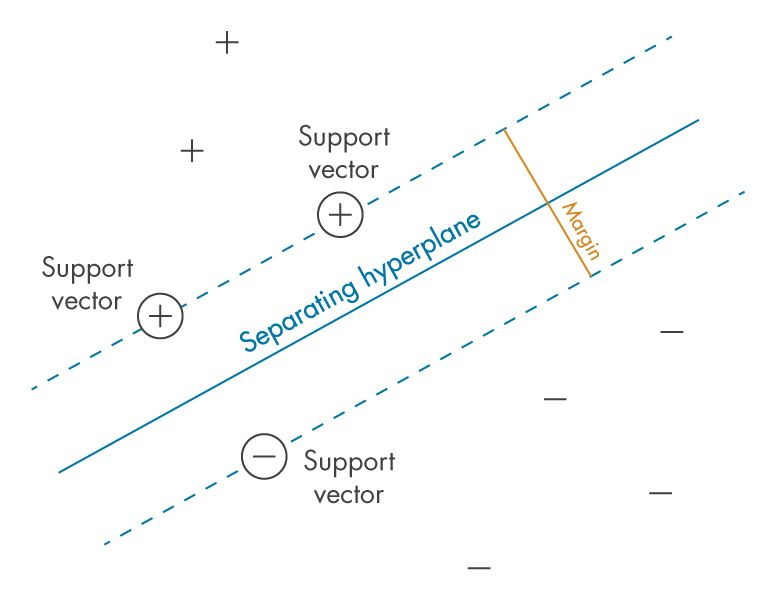



Trabalhando com a analogia de Géron (p. 175), o SVM funciona por meio da tentativa de encaixe da rua (hiperplano) mais larga possível (até onde vai o tracejado) entre as classes. Isso é chamado de Classificação de margem larga (*Large Margin Classification*). Vamos continuar trabalhando com o exemplo dos inadimplentes.

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x="balance", y="income", hue="default")

Olhando para essa imagem, parece ser possível traçar um hiperplano entre as classes de forma a separar-las linearmente, com alguns erros é claro. A permissão de erros na classificação pelo SVM é chamada de "soft margin classification", e a quantidade de erros que o modelo pode cometer é controlado pelo hiperparâmetro C (Ler página 376 do ISLP). O controle desse parâmetro é muito importante no SVM.

Então, vamos tentar utilizar este modelo para a classificação dos inadimplentes. Primeiro, vamos utilizar o Kernel linear do SVM.

### SVC - Kernel Linear

Antes de tudo, vamos pegar as funções necessárias

In [ ]:
from sklearn.svm import SVC

**modelos SVM são bem sensíveis à escala das variáveis**. Isto é, se houver muita diferença de grandeza (como há entre income e balance), ele vai obter piores resultados. Portanto, vamos transformar income e balance para evitar problemas. Vamos utilizar o Scaler padrão do Scikit-Learn (Leia mais sobre no seguinte [Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ativando o scaler
scaler = StandardScaler()

# Pegando as features e targets
X = df_encoded[['balance', 'income']]  # Seleciona apenas as colunas 'balance' e 'income'
y = df_encoded['default_Yes']

# Aplicando o escalonamento apenas às colunas 'balance' e 'income'
X_scaled = scaler.fit_transform(X)


Não vamos utilizar a variável de estudante no momento. Agora, vamos dividir o banco entre treino e teste.

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scaled,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)

Agora, rodamos o modelo:

In [ ]:
# SVM Linear
svm_linear = SVC(C=10,
                 kernel = 'linear')

# Treinando o modelo
svm_linear.fit(X_treino,y_treino)

E avaliamos o resultado no banco de teste

In [ ]:
y_pred = svm_linear.predict(X_teste)


y_pred # Nosso array de previsões


Vamos checar a acurácia

In [ ]:
accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")

E o relatório de classificação

In [ ]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Temos algo estranho na classe minoritária (Inadimplentes). Vamos olhar a matriz de confusão

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


mat_conf = confusion_matrix(y_teste, y_pred)

# Defina os rótulos das classes (DICA)
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo não acertou nenhuma vez a classe minoritária!! Classificou todas as observações como Adimplentes. Vamos testar um SVM linear um pouco menos flexível. Utilizamos C=10, agora vamos tentar C=0.01

In [ ]:
# SVM Linear
svm_linear = SVC(C=0.01,
                 kernel = 'linear')

# Treinando o modelo
svm_linear.fit(X_treino,y_treino)

# Previsão no banco de treino

y_pred = svm_linear.predict(X_teste)

# Relatório de classificação

rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")


A situação não melhora aumentando a rigidez da margem. Talvez nosso problema seja que a relação não é explicada de forma linear. Antes, vamos fazer uma grid_search para checar diversos valores de C com uma 5-fold cross-validation.

In [ ]:
validacao = skm.ShuffleSplit(n_splits=5,
                             test_size = .20, # Tamanho para teste
                             random_state = 42)



# Definindo o grid_search
grid_search = skm.GridSearchCV(svm_linear,
                               {'C':[0.001, 0.01, 0.1, 1, 10]}, # Grid de valores a serem explorados
                               refit = True,
                               cv = validacao,
                               scoring = 'f1_macro')

# Retreinando o modelo com a cross-validation
grid_search.fit(X_treino, y_treino)

# Pegando o melhor score obtido
grid_search.best_score_

Vamos ver o valor de 'C' que nos deu o melhor score

In [ ]:
# Obtenha o melhor valor de hiperparâmetro encontrado
best_params = grid_search.best_params_

# O valor de best_params conterá o dicionário com os melhores valores de hiperparâmetro
print("Melhores hiperparâmetros:", best_params)

Vamos ver como o melhor modelo se sai no banco de teste:

In [ ]:
# Pegando o melhor modelo

best_SVM = grid_search.best_estimator_

# Previsão no banco de teste

y_pred = best_SVM.predict(X_teste)

# Relatório de classificação
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")


Podemos observar que não houve melhora alguma, parece que nosso problema está em utilizar um Kernel Linear.

### SVM - Kernel não Linear

Você pode definir um kernel não linear ou linear com a opção "kernel" no comando SVC. Aqui está um lista de Kernels do SVM ([Link](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)).

In [ ]:
# Criando o SVM com um Kernel Não linear

svm_rbf = SVC(kernel='rbf', # Kernel não linear
              C = 0.001, # Vamos ver se o melhor do exercício anterior nos ajuda
              gamma = 1 # https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
              )

# Treinando o modelo
svm_rbf.fit(X_treino,y_treino)

# Previsão no banco de teste

y_pred = svm_rbf.predict(X_teste)

# Relatório de classificação

rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")


Ainda não há melhora, vamos tentar outro grid search. Agora, vamos explorar outros valores de gamma também (isso vai aumentar um pouco o tempo de processamento).

In [ ]:
validacao = skm.ShuffleSplit(n_splits=5,
                             test_size = .20, # Tamanho para teste
                             random_state = 42)



# Definindo o grid_search
grid_search = skm.GridSearchCV(svm_rbf,
                               {'C':[0.001, 0.01, 0.1, 1, 10],
                                'gamma':[0.5,1,2,3,4]}, # Grid de valores de C a serem explorados
                               refit = True,
                               cv = validacao,
                               scoring = 'f1_macro')

# Retreinando o modelo com a cross-validation
grid_search.fit(X_treino, y_treino)

# Pegando o melhor score obtido
grid_search.best_score_

Vamos ver quais parâmetros deram os melhores resultados.

In [ ]:
# Obtenha o melhor valor de hiperparâmetro encontrado
best_params = grid_search.best_params_

# O valor de best_params conterá o dicionário com os melhores valores de hiperparâmetro
print("Melhores hiperparâmetros:", best_params)

In [ ]:
# Pegando o melhor modelo

best_SVM = grid_search.best_estimator_

# Previsão no banco de teste

y_pred = best_SVM.predict(X_teste)

# Relatório de classificação
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Conseguimos melhorar bastante a performance do modelo, mas ainda há problemas na classe minoritária, o que é esperado dado o desbalanceamento dos dados.

### Classificação de texto com SVM

Vamos refazer a classificação de relevância utilizando o SVM. Vamos pegar o target e os features já processados do primeiro exemplo e dividir entre treino e teste:

In [ ]:
texto = df_ex['texto_processado']
target = df_ex['Corrected_relevante']

X_treino, X_teste, y_treino, y_teste = train_test_split(texto,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

Vamos vetorizar novamente o texto.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Definindo o dicionário de stop_words
stop_words = stopwords.words('portuguese')

# Criando o vetorizador, utilizando nossa lista de stop_words

tfidf_vectorizer = TfidfVectorizer(stop_words = stop_words)

# Vetorizando o texto com TF_IDF

X_treino_vetorizado = tfidf_vectorizer.fit_transform(X_treino)

# Imprimindo o Tf-idf do primeiro tweet
print(X_treino_vetorizado[:1])

Perceba que não precisamos utilizar um standard scaler aqui pois todas as variáveis estão entre 0 e 1, portanto o SVM não será afetado.

Vamos tentar primeiro um SVM com Kernel Linear

In [ ]:
svm_linear = SVC(C=1,
                 kernel = 'linear')

# Treinando o modelo
svm_linear.fit(X_treino_vetorizado,y_treino)

Predições no banco de teste:

In [ ]:
X_teste_vetorizado = tfidf_vectorizer.transform(X_teste)

X_teste_vetorizado

# Predições no banco de teste
y_pred = modelo.predict(X_teste_vetorizado)

accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")

Vamos ver a matriz de confusão

In [ ]:
mat_conf = confusion_matrix(y_teste, y_pred)

class_names = ['Irrelevante', 'Relevante']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Vamos ver o relatório de classificação

In [ ]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

O modelo vai um pouco melhor que o decision trees sem o grid search, mas um pouco pior do que ele com gridsearch. No entanto, é interessante que obtivemos um bom resultado com um kernel linear para classificação de texto. Vamos ver como o modelo performa utilizando um kernel não linear

In [ ]:
# Criando o SVM com um Kernel Não linear

svm_rbf = SVC(kernel='rbf', # Kernel não linear
              C = 0.001, # Vamos ver se o melhor do exercício anterior nos ajuda
              gamma = 1 # https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
              )

# Treinando o modelo
svm_rbf.fit(X_treino_vetorizado,y_treino)

# Previsão no banco de teste

y_pred = svm_rbf.predict(X_teste_vetorizado)

# Relatório de classificação

rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")


É, parece que não foi uma boa ideia. Vamos tentar um gridsearch para melhorarmos esse resultado.

In [ ]:

svm_rbf = SVC(kernel='rbf', # Kernel não linear
              )


validacao = skm.ShuffleSplit(n_splits=5, # 5 folds
                             test_size = .20, # Tamanho para teste
                             random_state = 42)



# Definindo o grid_search
grid_search = skm.GridSearchCV(svm_rbf,
                               {'C':[0.001, 0.01, 0.1,1, 10, 10],
                                'gamma':[0.5,1,2]}, # Grid de valores de C e de gamma a serem explorados
                               refit = True,
                               cv = validacao,
                               scoring = 'f1_macro')

# Retreinando o modelo com a cross-validation
grid_search.fit(X_treino_vetorizado, y_treino)

# Pegando o melhor score obtido
grid_search.best_score_

Vamos checar os melhores parâmetros para esta tarefa

In [ ]:
# Obtenha o melhor valor de hiperparâmetro encontrado
best_params = grid_search.best_params_

# O valor de best_params conterá o dicionário com os melhores valores de hiperparâmetro
print("Melhores hiperparâmetros:", best_params)

Por fim, vamos ver o relatório de classificação.

In [ ]:
# Pegando o melhor modelo

best_SVM = grid_search.best_estimator_

# Previsão no banco de teste

y_pred = best_SVM.predict(X_teste_vetorizado)

# Relatório de classificação
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Chegamos em resultados muito parecidos com o do decision trees com gridsearch. Considerando isto, qual dos modelos você escolheria (SVM ou Decision Trees)? Por quê?

## Exercícios

1 - Vamos fazer a classificação de texto utilizando o SVM. Primeiro, vamos garantir que nossas variáveis de texto estão nos conformes. Pegue os vetores de target e de features de treino que você criou no exercício 4 da seção anterior

2 - Treine um SVM com Kernel Linear nestes dados, a tarefa é a de classificação de POSICIONAMENTO - COM TODAS AS CLASSES.

3 - Pegue o X_teste criado no exercício 6 da seção anterior e faça as predições com o SVM linear.

4 - Calcule a accuracy do SVM linear

5 - Imprima o relatório de classificação

6 - Discuta os resultados em relação ao Decision Tree.

RESPOSTA:

7 - Faça um grid search com o SVM linear explorando diferentes valores de C, além de utilizar um 5-fold cross validation. No score, utilize o f1_macro.

8 - Imprima o melhor valor de C

9- Faça as predições no banco de teste com o melhor modelo do grid_search

10 - Discuta os resultados do modelo

RESPOSTA:

11 - Faça um gridsearch com um SVM de kernel não linear com 5-fold cross-validation.

12 - Imprima os melhores parâmetros

13 - Faça a predição no banco de teste e imprima o relatório de classificação